# STAT207 Final Project - INSERT TITLE HERE


Austin Abraham, Kaiwen Chen, Laila Shaaban, Linh Pham

In [1704]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
from sklearn.metrics import confusion_matrix
from statsmodels.tools.sm_exceptions import PerfectSeparationWarning
warnings.filterwarnings("ignore", category=PerfectSeparationWarning)

## 1. Introduction

The motivation in our report is to try to figure out the type of transmission in a vehicle (automatic/manual). The primary research goal of this project is to build a predictive model that will perform the best when predicting the transmission type (automatic/manual) in new datasets. One type of person that would find this information useful would be someone who is interested in buying a car and seeing what type of transmission they would get in their vehicle because some people prefer one over the other. For our case, we would not need a classifier to make positive or negative values more accurate, we would want them to be equally accurate because we would not be sure exactly what each person would be interested in. We could possibly add a slight higher accuracy for automatic transmission due to it being higher popularity according to Smith & Johnson. Brown & White also mention a heavier focus on automatic transmissions. Even though there is more popularity with automatic vehicles we think there should be no bias in the accuracy of the transmission types due to the diverse population that could use this tool.

Citations: \
Smith, J., & Johnson, R. (Year). "Consumer Preferences for Transmission Types in the Automobile Market: A Survey Analysis." Journal of Automotive Research

Brown, A., & White, L. (Year). "Market Trends and Preferences in Automotive Transmission Technologies." International Journal of Automotive Engineering

## 2. Dataset Discussion

We got the csv file from kaggle (link: https://www.kaggle.com/datasets/sujithmandala/second-hand-car-price-prediction?resource=download). We downloaded this csv file on April 25th. The rows of this dataset represent an individual cars that have different features. This dataset was collected by looking at car sales from the past. There are some observations that are left out for example, color of vehicle. This could not affect the transmission type so it is fine. We intend to use `Transmission` as our response variable which gives us whether the vehicle is automatic or manual. The explanatory variables are `Fuel_Type`, `Kilometers_Driven`, `Engine`, `Power`, and `Price`. These are all pretty self explanatory. Only ones that might not be are `Fuel_Type` which is petrol(gas) or diesel, `Engine` which is the size of the engine, and `Power` which is horsepower. We chose these variables because we feel that they will be the main focuses when someone is looking to buy a car, and they each seem to be correlated to the transmission type. For example, a lot of lower power engines tend to be manual especially in Europe.

In [1705]:
dforiginal=pd.read_csv('cars.csv')
dforiginal.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [1706]:
dforiginal.shape[0]

100

## 3. Dataset Cleaning

There are no implicit or explicit missing values in the data set. We dropped 0 rows from missing value detection. Since we did not drop any there are no pros or cons associated with a technique for cleaning missing values. We just checked the dtypes for implicit and then we used dropna for explicit. We did not do any sample size cleaning as our dataset was already of a good size. When looking at outliers, we dropped 1 outlier which was an engine size above 4000 as this outlier would throw our results off. This will help us have a more accurate representation for the majority of vehciles.

In [1707]:
dforiginal.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

In [1708]:
dfdrop=dforiginal.dropna()
print('Rows dropped:', dforiginal.shape[0]-dfdrop.shape[0])

Rows dropped: 0


In [1709]:
df=dforiginal[['Transmission', 'Fuel_Type', 'Price','Kilometers_Driven', 'Engine', 'Power']]

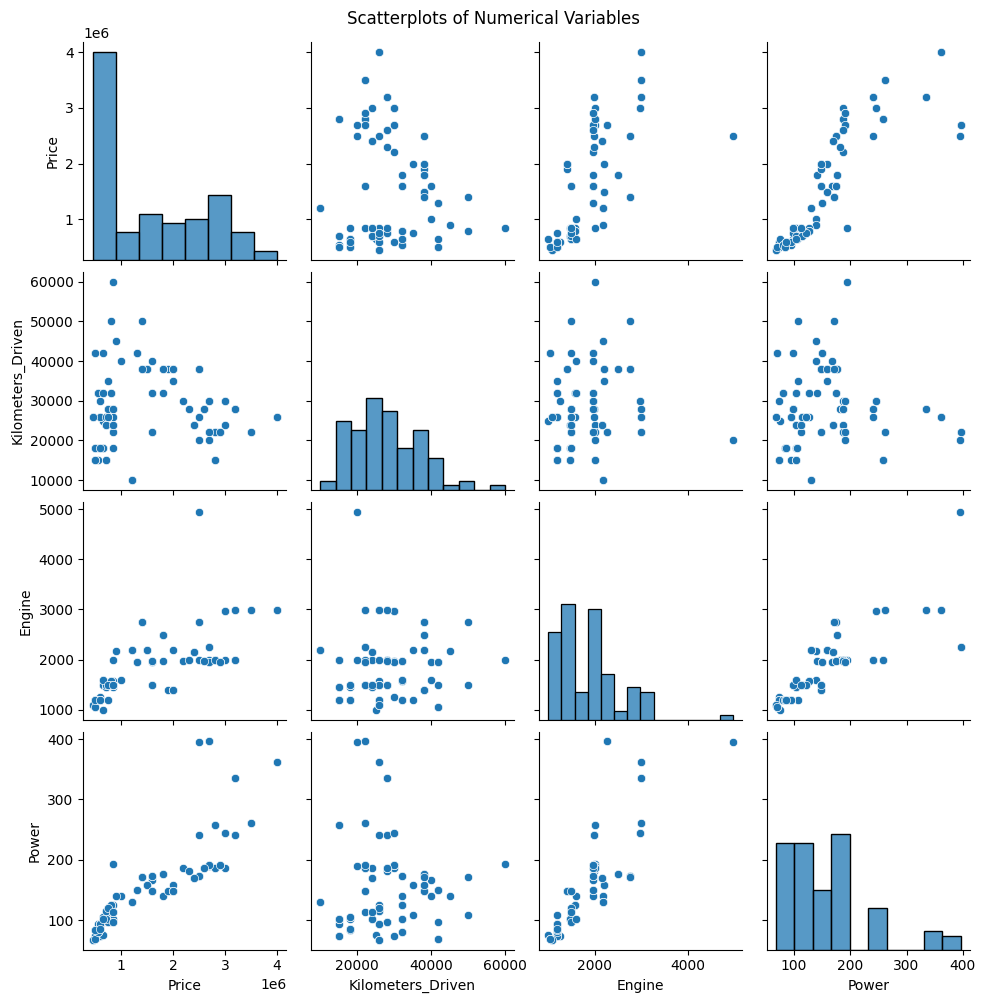

In [1710]:
sns.pairplot(df)
plt.suptitle('Scatterplots of Numerical Variables', y = 1)
plt.show()

In [1711]:
rows = df.shape[0]
df=df[df.Engine<=4000]

In [1712]:
print('Rows Dropped:', rows - df.shape[0])

Rows Dropped: 1


## 4. Preliminary Analysis

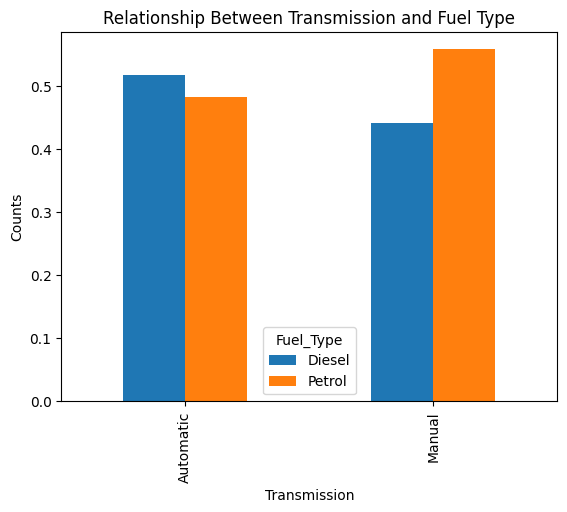

In [1713]:
#Transmission and Fuel_Type
temp=pd.crosstab(df['Transmission'], df['Fuel_Type'], normalize='index')
temp.plot.bar()
plt.title('Relationship Between Transmission and Fuel Type')
plt.ylabel('Counts')
plt.show()

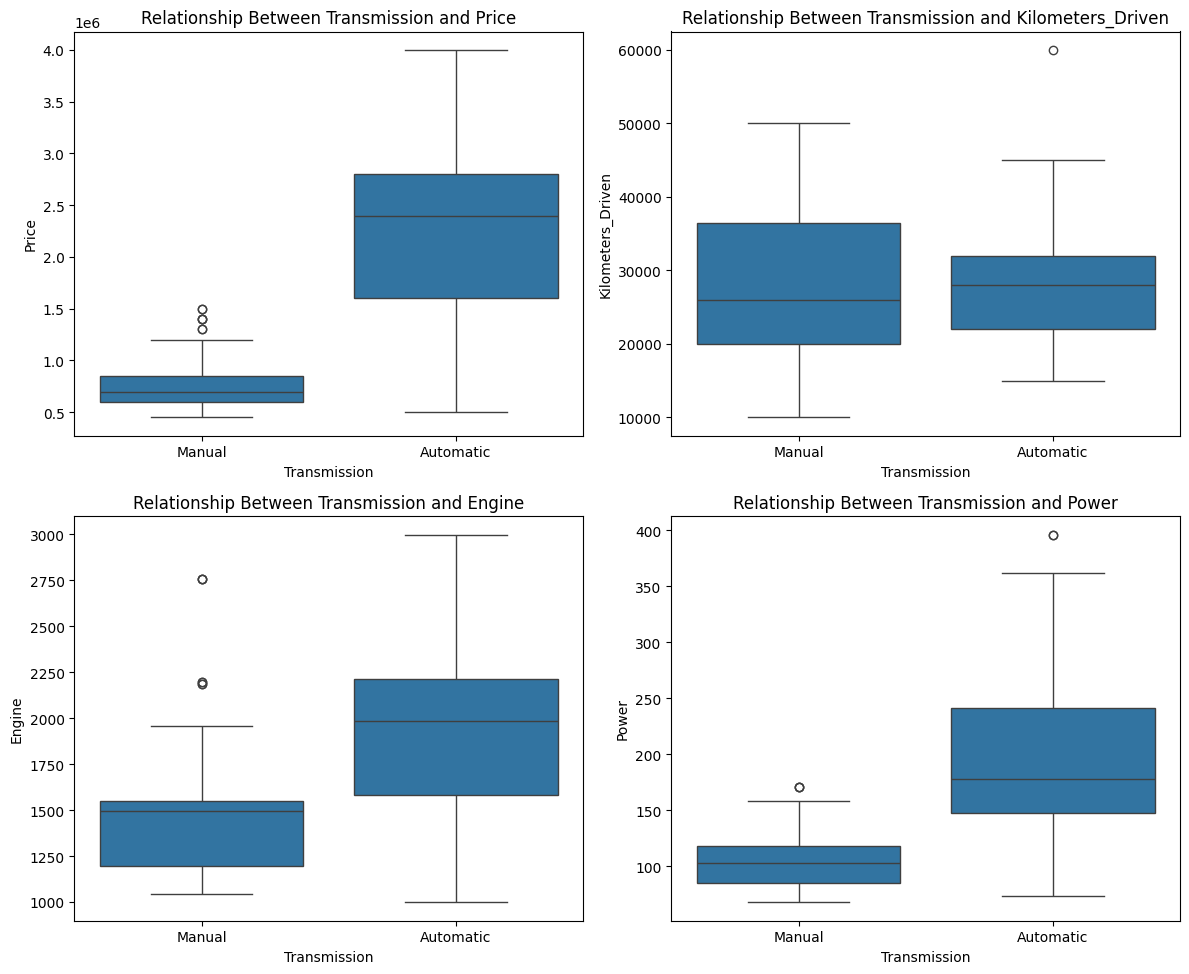

In [1714]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

explanatory_vars = ['Price','Kilometers_Driven', 'Engine', 'Power']
for i, var in enumerate(explanatory_vars):
    sns.boxplot(x='Transmission', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'Relationship Between Transmission and {var}')

plt.tight_layout()
plt.show()

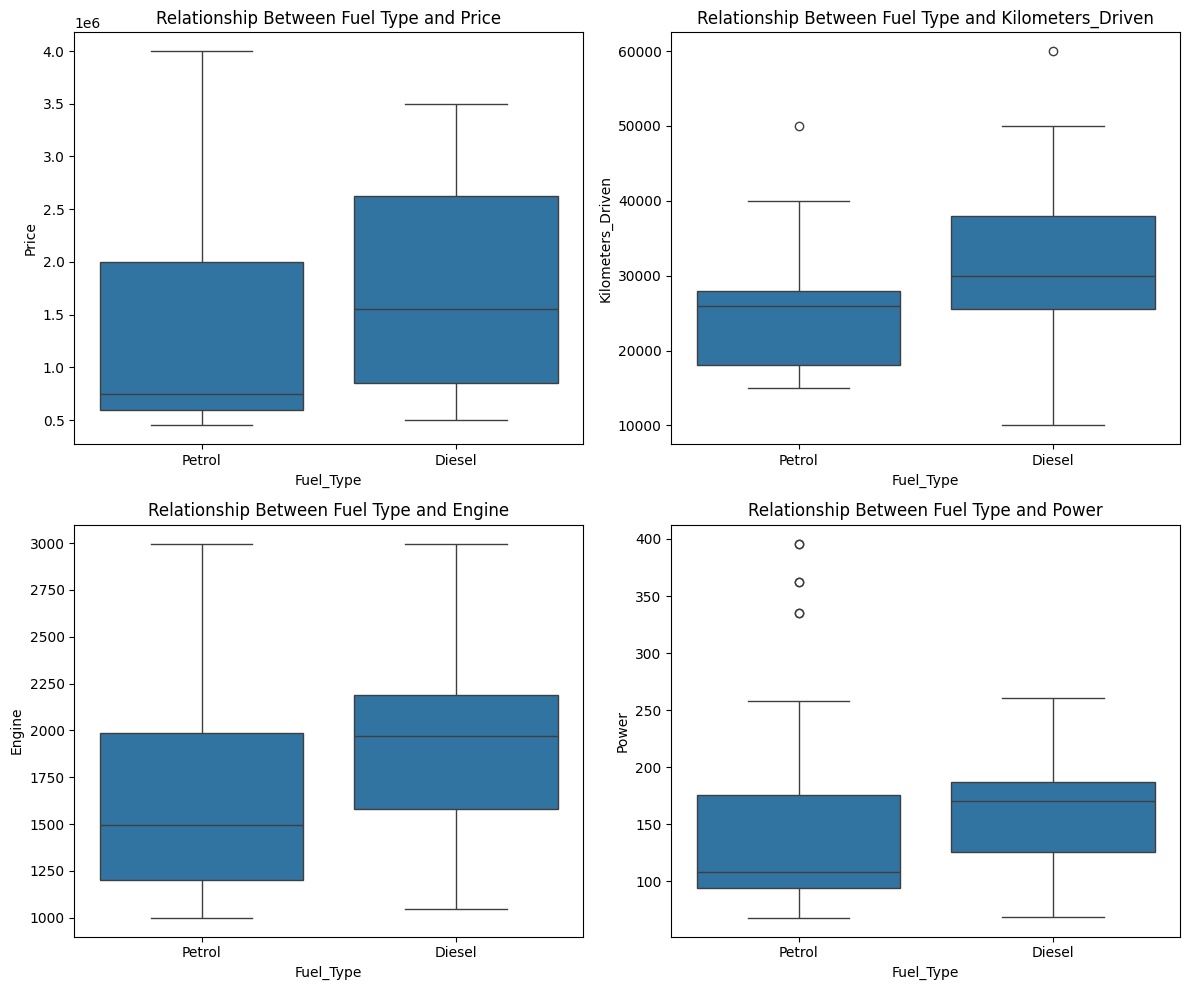

In [1715]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

explanatory_vars = ['Price','Kilometers_Driven', 'Engine', 'Power']
for i, var in enumerate(explanatory_vars):
    sns.boxplot(x='Fuel_Type', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'Relationship Between Fuel Type and {var}')

plt.tight_layout()
plt.show()

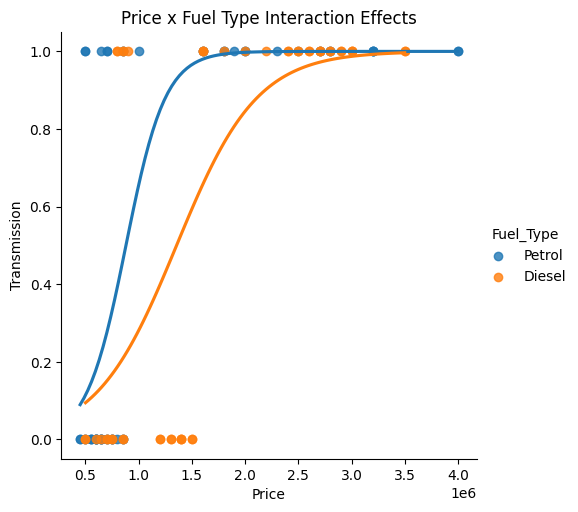

Optimization terminated successfully.
         Current function value: 0.332427
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-4.7482,1.842,-2.577,0.010,-8.359,-1.137
Price,5.393e-06,2.53e-06,2.129,0.033,4.28e-07,1.04e-05


Optimization terminated successfully.
         Current function value: 0.379456
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-3.5825,1.077,-3.326,0.001,-5.693,-1.471
Price,2.642e-06,7.54e-07,3.502,0.000,1.16e-06,4.12e-06


In [1716]:
# Interaction Effects Price x Fuel Type

# Creating Indicator Variable
df['y'] = df['Transmission'].replace({'Automatic':1, 'Manual':0})

#1. Plot two logistic regression models (for those with/without profile pics)
sns.lmplot(x='Price',
            y='y',
            hue='Fuel_Type',
            data=df,
           logistic=True,
           ci=False)
plt.ylabel('Transmission')
plt.title('Price x Fuel Type Interaction Effects')
plt.show()

#2. Simple logistic regression model (with profile pics)
simple_log_model=smf.logit('y~Fuel_Type+Price',
                           data=df[df['Fuel_Type']=='Petrol']).fit()
display(simple_log_model.summary().tables[1])

#3. Simple logistic regression model (without profile pics)
simple_log_model=smf.logit('y~Fuel_Type+Price',
                           data=df[df['Fuel_Type']=='Diesel']).fit()
display(simple_log_model.summary().tables[1])
    
warnings.resetwarnings()

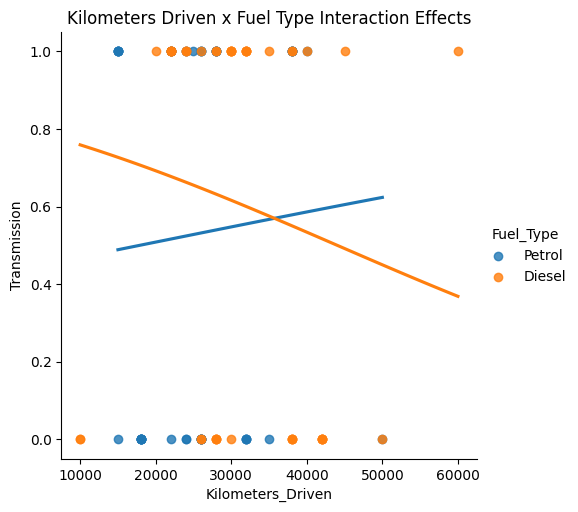

Optimization terminated successfully.
         Current function value: 0.689518
         Iterations 4


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.2814,0.952,-0.296,0.768,-2.147,1.584
Kilometers_Driven,1.572e-05,3.59e-05,0.438,0.661,-5.46e-05,8.6e-05


Optimization terminated successfully.
         Current function value: 0.659802
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,1.4846,1.079,1.376,0.169,-0.631,3.600
Kilometers_Driven,-3.373e-05,3.27e-05,-1.031,0.302,-9.78e-05,3.04e-05


In [1717]:
#Interaction effects Fuel Type x Kilometers Driven

#1. Plot two logistic regression models (for those with/without profile pics)
sns.lmplot(x='Kilometers_Driven',
            y='y',
            hue='Fuel_Type',
            data=df,
           logistic=True,
           ci=False)
plt.ylabel('Transmission')
plt.title('Kilometers Driven x Fuel Type Interaction Effects')
plt.show()

#2. Simple logistic regression model (with profile pics)
simple_log_model=smf.logit('y~Fuel_Type+Kilometers_Driven',
                           data=df[df['Fuel_Type']=='Petrol']).fit()
display(simple_log_model.summary().tables[1])

#3. Simple logistic regression model (without profile pics)
simple_log_model=smf.logit('y~Fuel_Type+Kilometers_Driven',
                           data=df[df['Fuel_Type']=='Diesel']).fit()
display(simple_log_model.summary().tables[1])
    
warnings.resetwarnings()

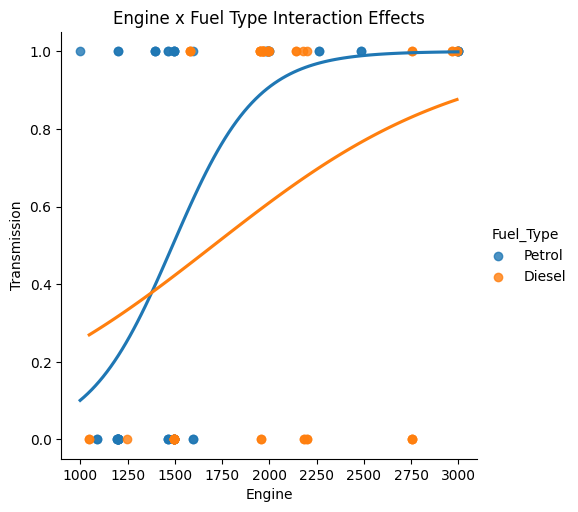

Optimization terminated successfully.
         Current function value: 0.482214
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-6.6682,2.199,-3.032,0.002,-10.979,-2.358
Engine,0.0045,0.002,2.960,0.003,0.002,0.007


Optimization terminated successfully.
         Current function value: 0.616681
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-2.5868,1.446,-1.789,0.074,-5.420,0.247
Engine,0.0015,0.001,2.091,0.037,9.48e-05,0.003


In [1718]:
#Interaction effects Fuel Type x Engine

#1. Plot two logistic regression models (for those with/without profile pics)
sns.lmplot(x='Engine',
            y='y',
            hue='Fuel_Type',
            data=df,
           logistic=True,
           ci=False)
plt.ylabel('Transmission')
plt.title('Engine x Fuel Type Interaction Effects')
plt.show()

#2. Simple logistic regression model (with profile pics)
simple_log_model=smf.logit('y~Fuel_Type+Engine',
                           data=df[df['Fuel_Type']=='Petrol']).fit()
display(simple_log_model.summary().tables[1])

#3. Simple logistic regression model (without profile pics)
simple_log_model=smf.logit('y~Fuel_Type+Engine',
                           data=df[df['Fuel_Type']=='Diesel']).fit()
display(simple_log_model.summary().tables[1])
    
warnings.resetwarnings()

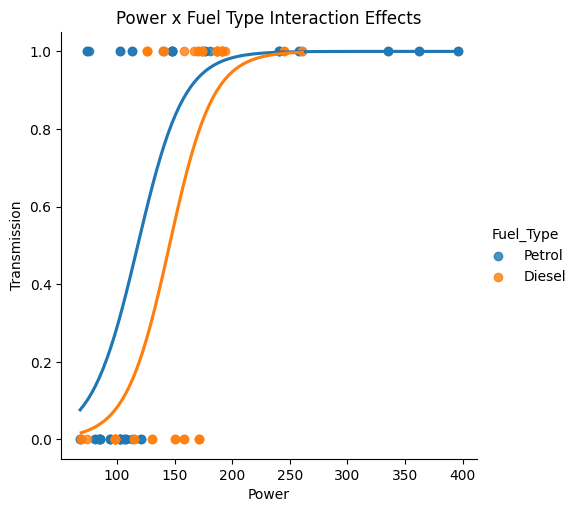

Optimization terminated successfully.
         Current function value: 0.395700
         Iterations 8


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-5.8922,1.869,-3.153,0.002,-9.555,-2.230
Power,0.0499,0.017,2.966,0.003,0.017,0.083


Optimization terminated successfully.
         Current function value: 0.393462
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-7.7042,2.315,-3.328,0.001,-12.242,-3.167
Power,0.0529,0.015,3.566,0.000,0.024,0.082


In [1719]:
#Interaction effects Fuel Type x Power

#1. Plot two logistic regression models (for those with/without profile pics)
sns.lmplot(x='Power',
            y='y',
            hue='Fuel_Type',
            data=df,
           logistic=True,
           ci=False)
plt.ylabel('Transmission')
plt.title('Power x Fuel Type Interaction Effects')
plt.show()

#2. Simple logistic regression model (with profile pics)
simple_log_model=smf.logit('y~Fuel_Type+Power',
                           data=df[df['Fuel_Type']=='Petrol']).fit()
display(simple_log_model.summary().tables[1])

#3. Simple logistic regression model (without profile pics)
simple_log_model=smf.logit('y~Fuel_Type+Power',
                           data=df[df['Fuel_Type']=='Diesel']).fit()
display(simple_log_model.summary().tables[1])
    
warnings.resetwarnings()

## 5. Model Data Preprocessing

We started by re-displaying our dataframe with the binary form of our response variable, `Transmission`, as `y` which is our 0/1 variable to show if the transmission is manual or not. Then we created features matrix `X` and target array `y` by selecting columns accordingly. Lastly, we scaled numerical variables using StandardScaler(). We did not need to translate categorical variables as they already were.

In [1720]:
df = df.drop('Transmission', axis = 1)
df.head()

,Fuel_Type,Price,Kilometers_Driven,Engine,Power,y
0,Petrol,800000,50000,1498,108,0
1,Petrol,1000000,40000,1597,140,1
3,Diesel,600000,30000,1248,74,0
4,Diesel,850000,60000,1999,194,1
5,Petrol,750000,35000,1198,108,0


In [1721]:
# Features Matrix
X = df.drop('y',axis = 1)
X.head()

,Fuel_Type,Price,Kilometers_Driven,Engine,Power
0,Petrol,800000,50000,1498,108
1,Petrol,1000000,40000,1597,140
3,Diesel,600000,30000,1248,74
4,Diesel,850000,60000,1999,194
5,Petrol,750000,35000,1198,108


In [1722]:
# Target Array
y = df['y']
y.head()

0    0
1    1
3    0
4    1
5    0
Name: y, dtype: int64

In [1723]:
numerical_vars = ['Price', 'Kilometers_Driven', 'Engine', 'Power']
scaler = StandardScaler()
X[numerical_vars] = scaler.fit_transform(X[numerical_vars])
X.head()

,Fuel_Type,Price,Kilometers_Driven,Engine,Power
0,Petrol,-0.767809,2.396226,-0.594355,-0.652553
1,Petrol,-0.566981,1.295408,-0.413839,-0.215124
3,Diesel,-0.968636,0.194589,-1.050206,-1.117320
4,Diesel,-0.717602,3.497044,0.319169,0.523036
5,Petrol,-0.818015,0.744998,-1.141376,-0.652553


In [1724]:
# Changing categorical to indicator
X['Fuel_Type'] = X['Fuel_Type'].replace({'Petrol':1, 'Diesel':0})
X.head()

,Fuel_Type,Price,Kilometers_Driven,Engine,Power
0,1,-0.767809,2.396226,-0.594355,-0.652553
1,1,-0.566981,1.295408,-0.413839,-0.215124
3,0,-0.968636,0.194589,-1.050206,-1.117320
4,0,-0.717602,3.497044,0.319169,0.523036
5,1,-0.818015,0.744998,-1.141376,-0.652553


## 6. Feature Selection with k-Fold Cross-Validation

In [1725]:
cross_val = KFold(n_splits=5, shuffle=True, random_state=42)

In [1726]:
model = LogisticRegression()

### Backwards Elimination with Cross-Validation

In [1727]:
# Original
test_fold_auc1 = cross_val_score(model, X, y, cv=cross_val, scoring='roc_auc')
print('mean test fold auc original: ', test_fold_auc1.mean())
# Dropping price
X1 = X.drop(['Price'], axis = 1)
test_fold_auc2 = cross_val_score(model, X1, y, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc when dropping price: ', test_fold_auc2.mean())
# Dropping kilo driven
X2 = X.drop(['Kilometers_Driven'], axis = 1)
test_fold_auc3 = cross_val_score(model, X2, y, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc when dropping kilo driven: ', test_fold_auc3.mean())
# Dropping engine
X3 = X.drop(['Engine'], axis = 1)
test_fold_auc3 = cross_val_score(model, X3, y, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc when dropping engine:', test_fold_auc3.mean())
# Dropping power
X4 = X.drop(['Power'], axis = 1)
test_fold_auc4 = cross_val_score(model, X4, y, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc when dropping power: ', test_fold_auc4.mean())
# Dropping fuel type
X5 = X.drop(['Fuel_Type'], axis = 1)
test_fold_auc5 = cross_val_score(model, X5, y, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc when dropping fuel type: ', test_fold_auc5.mean())


mean test fold auc original:  0.8935298035298034
mean test fold auc when dropping price:  0.9003395215895216
mean test fold auc when dropping kilo driven:  0.9064733877233877
mean test fold auc when dropping engine: 0.9042898767898768
mean test fold auc when dropping power:  0.8848530636030636
mean test fold auc when dropping fuel type:  0.9022065434565434


From the first round of choosing, we can see when we drop `Kilometers_Driven`, we will get the highest AUC. Thus, we choose to drop this variable.

In [1728]:
# Dropping kilo driven
X2 = X.drop(['Kilometers_Driven'], axis = 1)
test_fold_auc3 = cross_val_score(model, X2, y, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc when dropping kilo driven: ', test_fold_auc3.mean())
# Dropping price
X6 = X2.drop(['Price'], axis = 1)
test_fold_auc6 = cross_val_score(model, X6, y, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc when dropping kilo driven and price: ', test_fold_auc6.mean())
# Dropping engine
X7 = X2.drop(['Engine'], axis = 1)
test_fold_auc7 = cross_val_score(model, X7, y, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc when dropping kilo driven and engine: ', test_fold_auc7.mean())
# Dropping power
X4 = X2.drop(['Power'], axis = 1)
test_fold_auc4 = cross_val_score(model, X4, y, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc when dropping kilo driven and power: ', test_fold_auc4.mean())
# Dropping fuel type
X9 = X2.drop(['Fuel_Type'], axis = 1)
test_fold_auc9 = cross_val_score(model, X9, y, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc when dropping kilo driven and fuel type: ', test_fold_auc9.mean())

mean test fold auc when dropping kilo driven:  0.9064733877233877
mean test fold auc when dropping kilo driven and price:  0.9058441558441558
mean test fold auc when dropping kilo driven and engine:  0.9043142968142968
mean test fold auc when dropping kilo driven and power:  0.8911274836274835
mean test fold auc when dropping kilo driven and fuel type:  0.9174623987123987


In our second round of choosing, we see that dropping `Kilometers_Driven` and `Fuel_Type` gives us the highest AUC. Thus, we choose to drop these variables.

In [1729]:
# Dropping fuel type
X9 = X2.drop(['Fuel_Type'], axis = 1)
test_fold_auc9 = cross_val_score(model, X9, y, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc when dropping kilo driven and fuel type: ', test_fold_auc9.mean())
# Dropping price
X6 = X9.drop(['Price'], axis = 1)
test_fold_auc6 = cross_val_score(model, X6, y, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc when dropping kilo driven and fuel type and price: ', test_fold_auc6.mean())
# Dropping engine
X7 = X9.drop(['Engine'], axis = 1)
test_fold_auc7 = cross_val_score(model, X7, y, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc when dropping kilo driven and fuel type and engine: ', test_fold_auc7.mean())
# Dropping power
X4 = X9.drop(['Power'], axis = 1)
test_fold_auc4 = cross_val_score(model, X4, y, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc when dropping kilo driven and fuel type and power: ', test_fold_auc4.mean())

mean test fold auc when dropping kilo driven and fuel type:  0.9174623987123987
mean test fold auc when dropping kilo driven and fuel type and price:  0.9060730935730936
mean test fold auc when dropping kilo driven and fuel type and engine:  0.9130810855810856
mean test fold auc when dropping kilo driven and fuel type and power:  0.9043142968142968


In our third round of choosing, we see that dropping `Kilometers_Driven` and `Fuel_Type` continue to give us the highest AUC. Thus, this will be our final model.

In [1730]:
# Dropping fuel type
X9 = X2.drop(['Fuel_Type'], axis = 1)
test_fold_auc9 = cross_val_score(model, X9, y, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc when dropping kilo driven and fuel type: ', test_fold_auc9.mean())

mean test fold auc when dropping kilo driven and fuel type:  0.9174623987123987


## 7. Best Model Discussion

In [1731]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Fuel_Type,Price,Kilometers_Driven,Engine,Power
50,1,1.140049,-0.686066,0.796900,3.284303
71,1,-0.868222,-0.465902,-0.659998,-0.720901
69,0,-0.767809,0.414753,-0.441190,-0.406499
16,0,0.236327,0.414753,0.262644,-0.201455
40,0,-0.064914,1.075244,0.682026,0.030929


In [1732]:
y_train = pd.DataFrame(y_train, columns=['y'])
y_test = pd.DataFrame(y_test, columns=['y'])
y_train.head()

,y
50,1
71,0
69,1
16,1
40,0


In [1733]:
X_train_bestfeatures = X_train[['Price','Power','Engine']]
X_test_bestfeatures = X_test[['Price','Power','Engine']]

In [1734]:
best_model = model.fit(X_train_bestfeatures, y_train)
print(best_model.coef_.T)
print(best_model.intercept_)

[[ 1.67671216]
 [ 1.36790363]
 [-0.65370096]]
[0.915311]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


$
\hat{p} = \frac{1}{1 + \exp\left(-\begin{aligned}
&0.915311 \\
&+ 1.36790363(\,\text{power}) \\
&+ -0.65370096(\,\text{engine}) \\
&+ 1.67671216(\,\text{price})
\end{aligned}\right)}
$

In [1735]:
X_train_bestfeatures.corr()

,Price,Power,Engine
Price,1.000000,0.873316,0.781395
Power,0.873316,1.000000,0.779668
Engine,0.781395,0.779668,1.000000


Since there is at least one pair of explanatory variables with a correlation greater than 0.7, there will be an issue with multicollinearity.

Slope Interpretations: we are able to interpret the magnitudes of the slopes as indicating how important the corresponding 
explanatory (or indicator) variable is when it comes to predicting our response variable in a logistic
regression model because we have already scaled the value of every predictors. Thus, the magnitude of each explanatory variables is similar, we can use their coeffient to recognize their importance.
Based on their coefficients, the variable `Price` is more important than `Power`, which is more important than `Engine`.

Overfitting Explanatory Variables:

1. There are overfitting predictors in our model. As we can see in the process of backward elimination, we know the `Fuel_Type` and `Kilometers_Driven` are overfitting.

2. The `Kilometers_Driven` has the weakest relationship with `Transmission`, because it was dropped by backwards elimination at first. Likewise, the `Fuel_Type` has the second weakest relationship with `Transmission` since it was the second and last variable we dropped in our backwards elimination algorithm.

3. Some of these overfitting explanatory variables are strongly associated with other explanatory variables still left in the model. From the boxplot and pairplot in No.4 Preliminary Analysis, we can see the `Fuel_Type` had a strong association with `Engine` and `Power`, because the IQRs are separated in the boxplots. Also, `Power` has a strong association with `Price`, as seen in the pairplots.

### Test ROC and AUC

In [1736]:
pred_prob_test = model.predict(X_test_bestfeatures)
X_test_bestfeatures['predictive_prob'] = pred_prob_test
X_test_bestfeatures.head()

/var/folders/9x/y56vwwb97zncf3j5cr_1_k980000gn/T/ipykernel_32935/599176437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_bestfeatures['predictive_prob'] = pred_prob_test


,Price,Power,Engine,predictive_prob
63,0.035500,0.249644,0.262644,1
41,-1.119256,-1.199338,-1.345597,0
96,-0.165327,0.208635,1.697661,0
19,0.939221,1.165509,0.304582,1
98,-0.717602,-0.584204,-0.596179,0


In [1737]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='Roc curve (area = '+ str(round(auc,3))+')')
    plt.plot([0,1], [0,1], color='navy',lw=lw,linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc curve')
    plt.legend(loc='lower right')
    plt.show()

In [1738]:
auc = roc_auc_score(y_true = y_test,
                    y_score = X_test_bestfeatures['predictive_prob'])
auc

0.8541666666666667

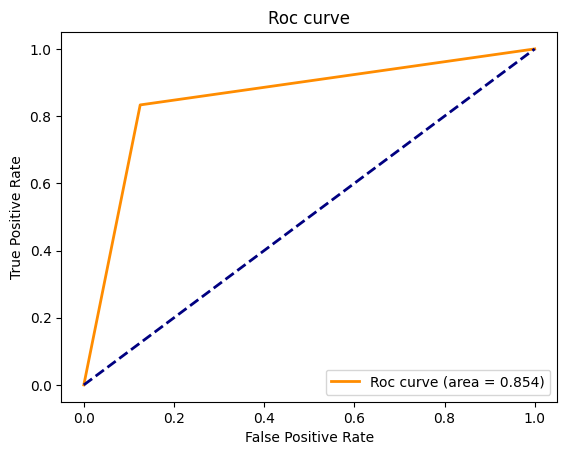

In [1739]:
fprs, tprs, thresholds = roc_curve(y_test,
                                   y_score= X_test_bestfeatures['predictive_prob'])
plot_roc(fprs, tprs, auc)

The ability of the model to classify the data is very good, because the AUC is much higher than 0.5 and close to 1. And the Roc curve is close to the ideal curve.

### Best Predictive Probability Threshold

In [1740]:
def fpr_tpr_thresh(y, pre_prob, thresh):
    yhat = 1*(pre_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'fpr':[fpr],
                         'tpr':[tpr]})

In [1741]:
for thresh in np.arange(0, 1.01, 0.01):
    print(fpr_tpr_thresh(X_test,
                         X_test_bestfeatures['predictive_prob'],
                         thresh))

   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold    fpr       tpr
0       0.01  0.125  0.833333
   threshold    fpr       tpr
0       0.02  0.125  0.833333
   threshold    fpr       tpr
0       0.03  0.125  0.833333
   threshold    fpr       tpr
0       0.04  0.125  0.833333
   threshold    fpr       tpr
0       0.05  0.125  0.833333
   threshold    fpr       tpr
0       0.06  0.125  0.833333
   threshold    fpr       tpr
0       0.07  0.125  0.833333
   threshold    fpr       tpr
0       0.08  0.125  0.833333
   threshold    fpr       tpr
0       0.09  0.125  0.833333
   threshold    fpr       tpr
0        0.1  0.125  0.833333
   threshold    fpr       tpr
0       0.11  0.125  0.833333
   threshold    fpr       tpr
0       0.12  0.125  0.833333
   threshold    fpr       tpr
0       0.13  0.125  0.833333
   threshold    fpr       tpr
0       0.14  0.125  0.833333
   threshold    fpr       tpr
0       0.15  0.125  0.833333
   threshold    fpr       tpr
0       0.16  0.125  0.8

In [1742]:
phat_test = best_model.predict(X_test_bestfeatures.drop(['predictive_prob'], axis = 1))
y_test['predict_tran'] = phat_test
y_test['yhat'] = 1*(y_test['predict_tran']>=0.9)
y_test[['y','yhat']].head()

,y,yhat
63,1,1
41,0,0
96,0,0
19,1,1
98,1,0


In [1743]:
conf_matrix = confusion_matrix(y_true = y_test['y'], y_pred = y_test['yhat'])

In [1744]:
tn, fp, fn, tp = conf_matrix.ravel()

In [1745]:
fpr = fp / (fp + tn)
tpr = tp / (tp + fn)

print("False Positive Rate (FPR):", fpr)
print("True Positive Rate (TPR):", tpr)

False Positive Rate (FPR): 0.125
True Positive Rate (TPR): 0.8333333333333334


From the ROC curve and our research goal, we finally decide to choose 0.85 as our threshold. And the FPR is 0.125, the TPR is 0.834. Thus, the rate of false positives are 0.125 and the rate of true positives is 0.834.

## 8. Additional Analysis/Insight

## 9. Conclusion

## References